# **Data augmentation for pytorch**

In [ ]:
#Data augmentation
!pip3 install 'torch'
!pip3 install 'torchvision'
!pip3 install --no-cache-dir -I 'pillow==5.1.0'

# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(00)

     |████████████████████████████████| 14.3MB 9.0MB/s 
  Created wheel for pillow: filename=Pillow-5.1.0-cp37-cp37m-linux_x86_64.whl size=1075741 sha256=e836ba91fcd661e8d5ed5b767e955fffa1c926a9be524cf885ab0d1a25857c9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-hzbwtt0o/wheels/75/85/02/24999a010ea6902deeb670352d8cb50301a74f2ba0c8ced944
Successfully built pillow
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import PIL
import numpy as np
import torch
import torchvision
print("Done!")

Done!


In [ ]:
#Show dataset
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset))))
  plt.imshow(img)
  plt.axis('off')
  print("Done!")

In [ ]:
#Transforms: 
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])
print(transforms)

Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
    ColorJitter(brightness=0, contrast=0, saturation=0.05, hue=0.05)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=(-20, 20), resample=2, expand=False)
)


In [ ]:
#Data
dataset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/UAB/M5_training/Dataset_little/', transform=transforms)
print(dataset)

Dataset ImageFolder
    Number of datapoints: 8
    Root Location: /content/drive/MyDrive/UAB/M5_training/Dataset_little/
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                             ColorJitter(brightness=0, contrast=0, saturation=0.05, hue=0.05)
                             RandomHorizontalFlip(p=0.5)
                             RandomRotation(degrees=(-20, 20), resample=2, expand=False)
                         )
    Target Transforms (if any): None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if sys.path[0] == '':


Done!


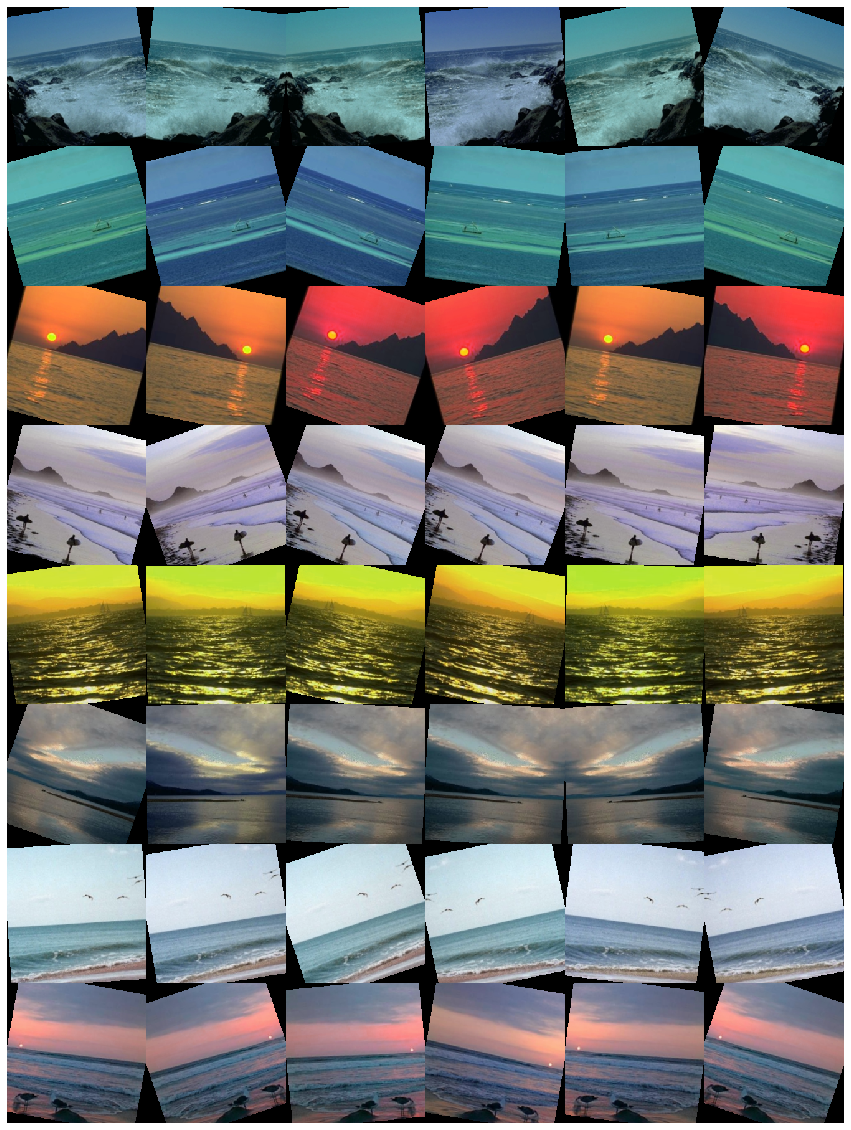

In [ ]:
show_dataset(dataset)

# Training with Data augmentation



In [1]:
#Cuda GPU
import torch
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())



Available devices  1
Current cuda device  0


In [2]:
torch.cuda.is_available()

True

In [6]:
'''
torch.cuda.set_device(device=gpu_id)
model.cuda()
inputs = inputs.cuda()
targets = targets.cuda()

#Numpy cannot work on CUDA Tensors, you need to
#send them to CPU before performing any operation on
#numpy:

var_cpu = var_gpu.cpu()

#Once all required operations on numpy have been
#done, remember to transform your data again to
#CUDA Tensors:
var_gpu = var_cpu.cuda()
'''


'\ntorch.cuda.set_device(device=gpu_id)\nmodel.cuda()\ninputs = inputs.cuda()\ntargets = targets.cuda()\n\n#Numpy cannot work on CUDA Tensors, you need to\n#send them to CPU before performing any operation on\n#numpy:\n\nvar_cpu = var_gpu.cpu()\n\n#Once all required operations on numpy have been\n#done, remember to transform your data again to\n#CUDA Tensors:\nvar_gpu = var_cpu.cuda()\n'

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

import PIL
import numpy as np

import torchvision

import torch.nn as nn
import torch.nn.functional as F
print("Done!")


Done!


In [8]:
#Transforms: 
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
print(transforms)

Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
    ColorJitter(brightness=None, contrast=None, saturation=[0.95, 1.05], hue=[-0.05, 0.05])
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-20.0, 20.0], resample=2, expand=False)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)


In [10]:
#Full Data 
dataset_train = torchvision.datasets.ImageFolder('/content/drive/MyDrive/UAB_M3/MIT_split/train', 
transform=transforms)
print(dataset_train)

dataset_test = torchvision.datasets.ImageFolder('/content/drive/MyDrive/UAB_M3/MIT_split/train', 
transform=transforms)
print(dataset_test)

Dataset ImageFolder
    Number of datapoints: 1881
    Root location: /content/drive/MyDrive/UAB_M3/MIT_split/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ColorJitter(brightness=None, contrast=None, saturation=[0.95, 1.05], hue=[-0.05, 0.05])
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], resample=2, expand=False)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset ImageFolder
    Number of datapoints: 1881
    Root location: /content/drive/MyDrive/UAB_M3/MIT_split/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ColorJitter(brightness=None, contrast=None, saturation=[0.95, 1.05], hue=[-0.05, 0.05])
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], resampl

In [11]:
#Trainloader

trainloader = torch.utils.data.DataLoader(dataset_train, batch_size=32,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(dataset_test, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('coast', 'forest', 'highway', 'inside_city',
           'mountain', 'Opencountry', 'street', 'tallbuilding')


print(trainloader)
print(testloader)
print(classes)



('coast', 'forest', 'highway', 'inside_city', 'mountain', 'Opencountry', 'street', 'tallbuilding')


In [12]:
#Creating network
#


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

dataiter <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fe7bdde0e50>


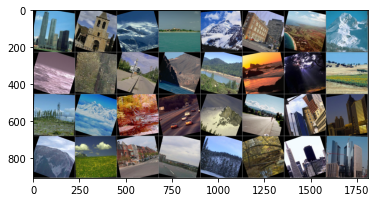

tallbuilding mountain Opencountry forest


In [13]:
import matplotlib.pyplot as plt
import numpy as np


# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
print("dataiter",dataiter)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
#Define a Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
#Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    print(trainloader)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        print(inputs)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1.

RuntimeError: ignored